# Decision trees - regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from interpret.glassbox import RegressionTree
from interpret import show

from interpret import set_visualize_provider
from interpret.provider import InlineProvider

set_visualize_provider(InlineProvider())

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467

### Split data

In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## Decision tree

In [4]:
# fit model

# RegressionTree is a wrapper for the DecisionTreeRegressor

tree = RegressionTree(
    criterion="squared_error",
    max_depth=3,
)

tree.fit(X_train, y_train)

In [5]:
# R2 in train set

tree.score(X_train, y_train)

0.5352201307625597

In [6]:
# R2 in test set

tree.score(X_test, y_test)

0.5005749951401735

## Global explanations

In [7]:
# the tree diagram

show(tree.explain_global())

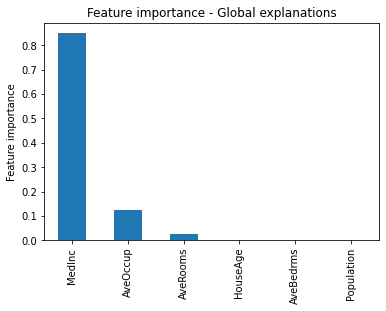

In [8]:
global_exp = pd.Series(tree.sk_model_.feature_importances_, index=tree.feature_names_in_)

global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

## Local explanations

In [9]:
X_test.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
14740  4.1518      22.0  5.663073   1.075472      1551.0  4.180593
10101  5.7796      32.0  6.107226   0.927739      1296.0  3.020979
20566  4.3487      29.0  5.930712   1.026217      1554.0  2.910112
2670   2.4511      37.0  4.992958   1.316901       390.0  2.746479
15709  5.0049      25.0  4.319261   1.039578       649.0  1.712401

In [10]:
# pick one observation

sample_id = 2670

X_test.loc[sample_id]

MedInc          2.451100
HouseAge       37.000000
AveRooms        4.992958
AveBedrms       1.316901
Population    390.000000
AveOccup        2.746479
Name: 2670, dtype: float64

In [11]:
show(tree.explain_local(X_test.loc[sample_id].to_frame().T), 0)